In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('~/data/trip.csv')

In [15]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [16]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [33]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


# 1. 결측치 판단 및 처리

In [18]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [41]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [37]:
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [38]:
data.dropna(subset = ['fare_amount'])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [42]:
data = data.dropna(subset = ['fare_amount'])

In [43]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

# * 중복데이터 제거하기

In [44]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [47]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [49]:
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [51]:
data.drop_duplicates()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [52]:
data = data.drop_duplicates()

In [58]:
data[data['passenger_name'] == 'Lisa Bullock' ]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [60]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


# 2. 이상치 판단 및 처리

<AxesSubplot:ylabel='trip_distance'>

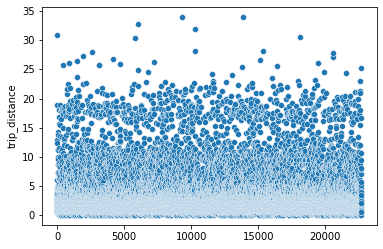

In [61]:
sns.scatterplot( x = data.index , y= data['trip_distance'])

<AxesSubplot:ylabel='passenger_count'>

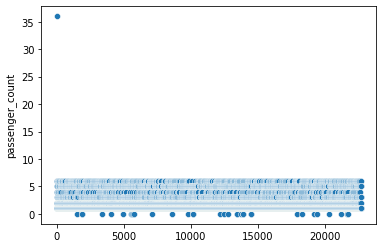

In [62]:
sns.scatterplot( x = data.index , y= data['passenger_count'])

In [65]:
data = data[data['passenger_count'] < 30]

<AxesSubplot:ylabel='passenger_count'>

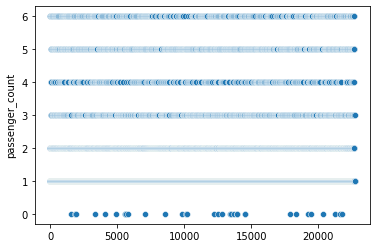

In [66]:
sns.scatterplot( x = data.index , y= data['passenger_count'])

<AxesSubplot:ylabel='fare_amount'>

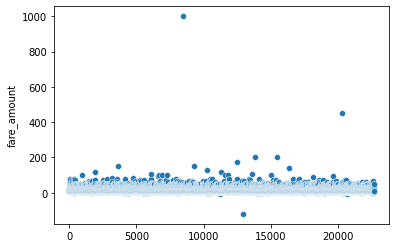

In [67]:
sns.scatterplot( x = data.index , y= data['fare_amount'])

In [72]:
# fare_amount 가 0인 것도 이상치로 간주하려 했으나, 혹시 모를 카드사 혜택이나 마일리지 등으로 실요금이 0원일 가능성을 포함시켰음.
data[data['fare_amount'] < 0] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [80]:
data = data[data['fare_amount'] >= 0]

In [81]:
data = data[data['fare_amount'] < 400]

<AxesSubplot:ylabel='fare_amount'>

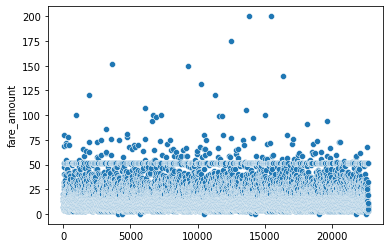

In [82]:
sns.scatterplot( x = data.index , y= data['fare_amount'])

<AxesSubplot:ylabel='tip_amount'>

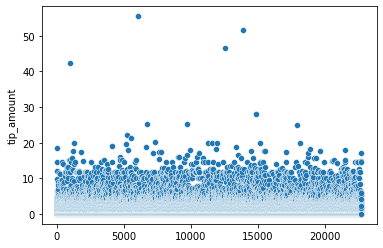

In [83]:
sns.scatterplot( x = data.index , y= data['tip_amount'])

In [84]:
# 'tip_amount' 의 경우 30달러 이상인 데이터는 4개정도 되는데 이상치로 보이지 않을 수 있지만 분포가 흩어져 있고, 
# 없어져도 이상이 없을 것으로 보여 제거
data = data[data['tip_amount'] < 30]

<AxesSubplot:ylabel='tip_amount'>

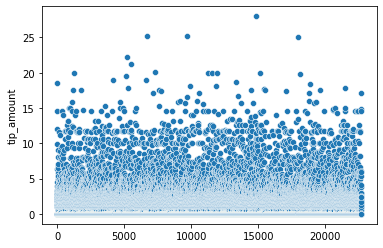

In [85]:
sns.scatterplot( x = data.index , y= data['tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

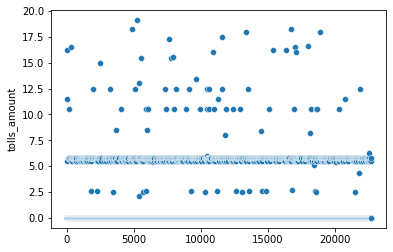

In [86]:
sns.scatterplot( x = data.index , y= data['tolls_amount'])

In [ ]:
# 'tolls_amount'의 경우 아주 밀집되어 있지는 않지만, 분산정도가 이상치 정도는 되지 않는 것으로 보여 제거X

# * 택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.


## ★[거리 = 속도 * 시간] 을 이용하여 거리별 평균속도를 구하고 'scatterplot'을 이용 후 분석★

In [121]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration_minutes,Prediction Speed,Prediction Speed (K/m),Prediction Speed (K/s),Prediction Speed (Km/s)
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,14.066667,0.237441,14.753921,14.753921,14.753921
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,26.500000,0.067925,4.220645,4.220645,4.220645
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,7.200000,0.138889,8.630177,8.630177,8.630177
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.250000,0.122314,7.600262,7.600262,7.600262
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,16.716667,0.261416,16.243662,16.243662,16.243662


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22675 entries, 0 to 22700
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   passenger_name           22675 non-null  object        
 1   tpep_pickup_datetime     22675 non-null  datetime64[ns]
 2   tpep_dropoff_datetime    22675 non-null  datetime64[ns]
 3   payment_method           22675 non-null  object        
 4   passenger_count          22675 non-null  int64         
 5   trip_distance            22675 non-null  float64       
 6   fare_amount              22675 non-null  float64       
 7   tip_amount               22675 non-null  float64       
 8   tolls_amount             22675 non-null  float64       
 9   trip_duration_minutes    22675 non-null  float64       
 10  Prediction Speed         22649 non-null  float64       
 11  Prediction Speed (K/m)   22649 non-null  float64       
 12  Prediction Speed (K/s)   22649 n

In [123]:
from datetime import datetime

In [124]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [125]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22675 entries, 0 to 22700
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   passenger_name           22675 non-null  object        
 1   tpep_pickup_datetime     22675 non-null  datetime64[ns]
 2   tpep_dropoff_datetime    22675 non-null  datetime64[ns]
 3   payment_method           22675 non-null  object        
 4   passenger_count          22675 non-null  int64         
 5   trip_distance            22675 non-null  float64       
 6   fare_amount              22675 non-null  float64       
 7   tip_amount               22675 non-null  float64       
 8   tolls_amount             22675 non-null  float64       
 9   trip_duration_minutes    22675 non-null  float64       
 10  Prediction Speed         22649 non-null  float64       
 11  Prediction Speed (K/m)   22649 non-null  float64       
 12  Prediction Speed (K/s)   22649 n

In [127]:
data['trip_duration_minutes'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [128]:
pd.DataFrame(data['trip_duration_minutes'])

,trip_duration_minutes
0,14.066667
1,26.500000
2,7.200000
3,30.250000
4,16.716667
...,...
22696,3.266667
22697,40.800000
22698,4.133333
22699,11.933333


In [129]:
data['trip_distance'] / data['trip_duration_minutes']

0        0.237441
1        0.067925
2        0.138889
3        0.122314
4        0.261416
           ...   
22696    0.186735
22697    0.409559
22698    0.101613
22699    0.197765
22700    0.157500
Length: 22675, dtype: float64

In [144]:
data['Average_Prediction Speed (Km/h)'] = (data['trip_distance'] / data['trip_duration_minutes'])/1.60934 * 60

In [145]:
pd.DataFrame(data['Average_Prediction Speed (Km/h)'])

,Average_Prediction Speed (Km/h)
0,8.852353
1,2.532387
2,5.178106
3,4.560157
4,9.746197
...,...
22696,6.961911
22697,15.269321
22698,3.788369
22699,7.373160


<AxesSubplot:xlabel='trip_distance', ylabel='Average_Prediction Speed (Km/h)'>

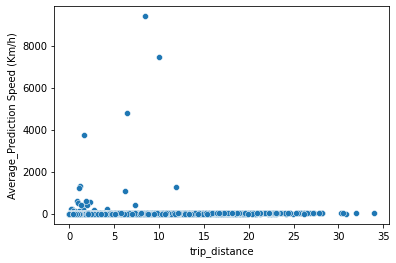

In [151]:
sns.scatterplot(x = data['trip_distance'] , y = data['Average_Prediction Speed (Km/h)'])

In [152]:
# 도로 평균 제한 속도는 100km/h 인데 현재 보이는 scatterplot 에서 2,000km/h도 말이 되지 않는 속도인데 그 이상인 데이터들이 나와서
# 도로 속도제한 기준 100km/h 이상인 속도는 이상치로 간주하여 제거
data = data[data['Average_Prediction Speed (Km/h)'] < 100]

In [153]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration_minutes,Prediction Speed,Prediction Speed (K/m),Prediction Speed (K/s),Prediction Speed (Km/s),Average_Prediction Speed (Km/s),Average_Prediction Speed (Km/h)
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,14.066667,0.237441,14.753921,14.753921,0.002459,0.002459,8.852353
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,26.500000,0.067925,4.220645,4.220645,0.000703,0.000703,2.532387
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,7.200000,0.138889,8.630177,8.630177,0.001438,0.001438,5.178106
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,30.250000,0.122314,7.600262,7.600262,0.001267,0.001267,4.560157
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,16.716667,0.261416,16.243662,16.243662,0.002707,0.002707,9.746197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3.266667,0.186735,11.603185,11.603185,0.001934,0.001934,6.961911
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,40.800000,0.409559,25.448869,25.448869,0.004241,0.004241,15.269321
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,4.133333,0.101613,6.313949,6.313949,0.001052,0.001052,3.788369
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,11.933333,0.197765,12.288600,12.288600,0.002048,0.002048,7.373160


<AxesSubplot:xlabel='trip_distance', ylabel='Average_Prediction Speed (Km/h)'>

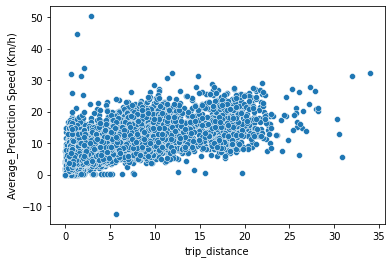

In [154]:
sns.scatterplot(x = data['trip_distance'] , y = data['Average_Prediction Speed (Km/h)'])

# * Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [ ]:
data.replace({'Credit Card' : 'Card' , 'Debit Card' : 'Card'})

In [ ]:
data = data.replace({'Credit Card' : 'Card' , 'Debit Card' : 'Card'})